This script is used to go through all the pictures and save the shadow lengt and the apparent crater diameter in pixels.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 10, 10
from matplotlib.pyplot import imshow
from numpy.linalg import norm
import rawpy
import PIL
from uncertainties import unumpy as unp
from uncertainties import ufloat
from uncertainties.umath import *
import os

#dummyvalues
r_mond=1737000. #r_mond in meter
pixerr=10

import import_ipynb
from astro_functions import coordinates

class LineBuilder:
    def __init__(self, line,number):
        self.line = line
        self.xs = list(line.get_xdata())
        self.ys = list(line.get_ydata())
        self.cid = line.figure.canvas.mpl_connect('button_press_event', self)
        self.anzahl=number
    def __call__(self, event):
        if event.inaxes!=self.line.axes: return
        self.xs.append(event.xdata)
        self.ys.append(event.ydata)
        self.line.set_data(self.xs, self.ys)
        self.line.figure.canvas.draw()
        if len(self.xs)==self.anzahl:
            line.figure.canvas.mpl_disconnect(self.cid)

Phase angle of the Moon (phi from proposal) with http://www.mondkalender-online.de/mondkalender/wunschkinder/mondwinkel-rechner.php.

Time Tim 01: 15.01.2019 22:00 -> websiteangle= 108°

Time Noa: 16.01.2019 21:00 -> websiteangle= 120°

Time Jennifer: 16.01.2019 01:10 -> websiteangle= 109°

Time Jennifer: 16.01.2019 18:35 -> websiteangle= 118°

In [9]:
degtorad=np.pi/180.
websiteangle=118.  # This value has to be changed for each folder!!!!
phi=(180.-websiteangle)*degtorad

Run the following box only once, otherwise the information in the list gets deleted!

In [10]:
craters = os.listdir('Moon_pictures')
print(len(craters))
print(craters)

coord_unsere = []
coord_pix =[]
diameter_pix =[]
shadow_pix = []

11
['IMG_1983.CR2', 'IMG_1984.CR2', 'IMG_1985.CR2', 'IMG_1987.CR2', 'IMG_1988.CR2', 'IMG_1992.CR2', 'IMG_1995.CR2', 'IMG_1997.CR2', 'IMG_1998.CR2', 'IMG_2001.CR2', 'IMG_2002.CR2']


FIRST mark 2 points for the diameter, THEN 2 points for the shadow:

<IPython.core.display.Javascript object>


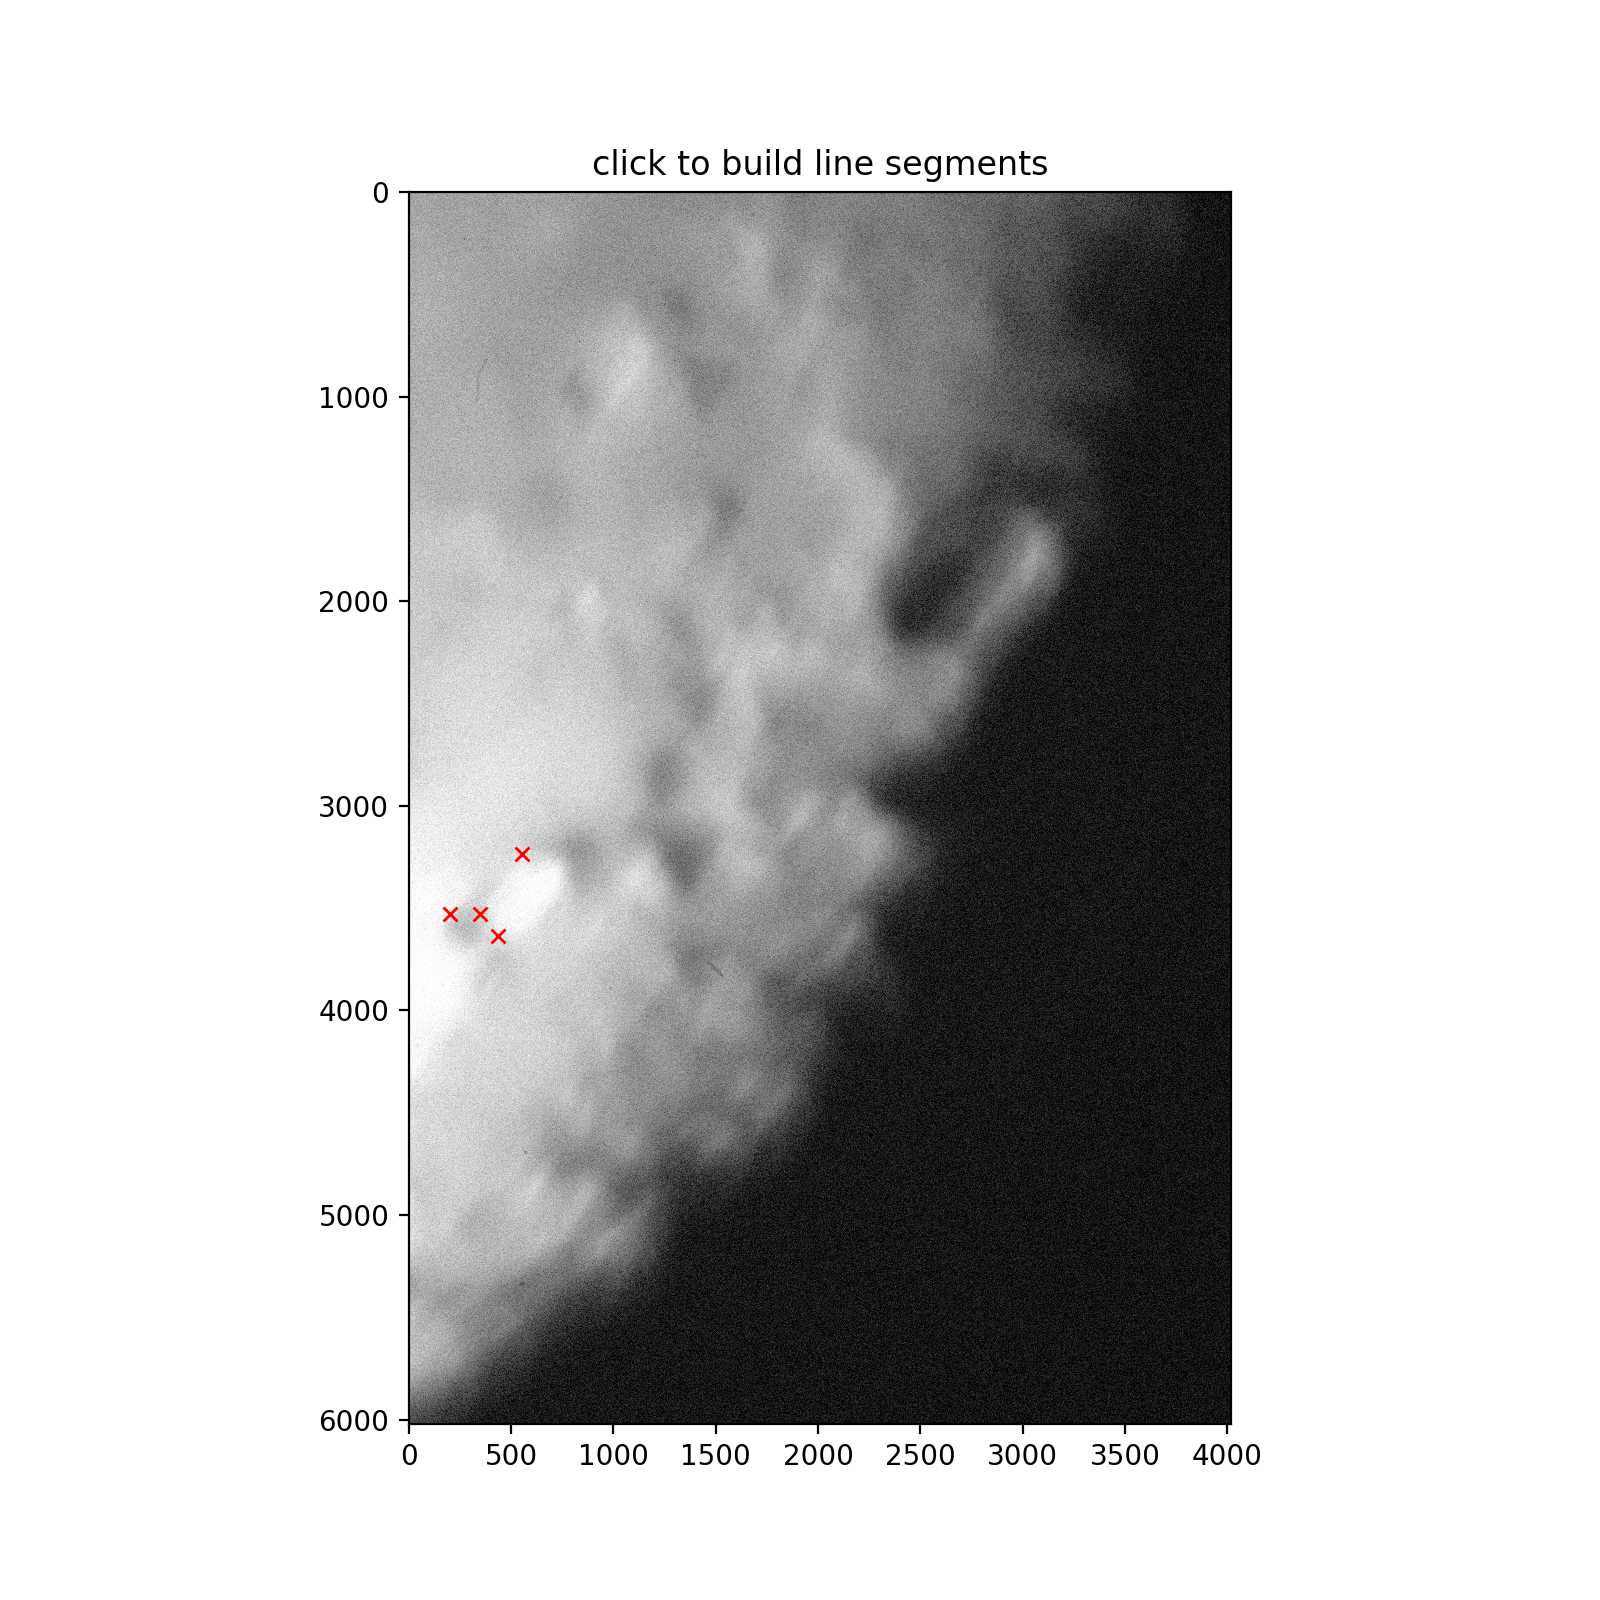

You can start selecting


In [11]:
n=4
i = 10 #The variable which indicates the picture

fig = plt.figure(figsize=(8,8))
#fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.set_title('click to build line segments')
line, = ax.plot([], [], color='r', marker='x', markersize=5, linestyle='')  # empty line
linebuilder = LineBuilder(line, n)
raw = rawpy.imread('Moon_pictures/'+craters[i])
rgb = raw.postprocess(use_camera_wb=True)
intensity = np.sum(rgb, axis=2)/3.0
picture = rgb
for j in range(3):
    picture[:,:,j] = intensity
    
#picture = plt.imread('MondMerge.jpg')
imshow(picture)
raw.close()
print('You can start selecting')
plt.show()
    

In [12]:
xvalues=linebuilder.xs
yvalues=linebuilder.ys

p0=np.array([xvalues[0],yvalues[0]])
p1=np.array([xvalues[1],yvalues[1]])
p2=np.array([xvalues[2],yvalues[2]])
p3=np.array([xvalues[3],yvalues[3]])

diam = norm(p0-p1)
shad = norm(p2-p3)

diameter_pix.append(diam)
shadow_pix.append(shad)

Dia = open('Diameters_in_pix', 'w')
Dia.write(str(diameter_pix))
Dia.close()

Sha = open('Shadow_in_pix', 'w')
Sha.write(str(shadow_pix))
Sha.close()

Mark the crater you have measured above below in the overview picture.

<IPython.core.display.Javascript object>


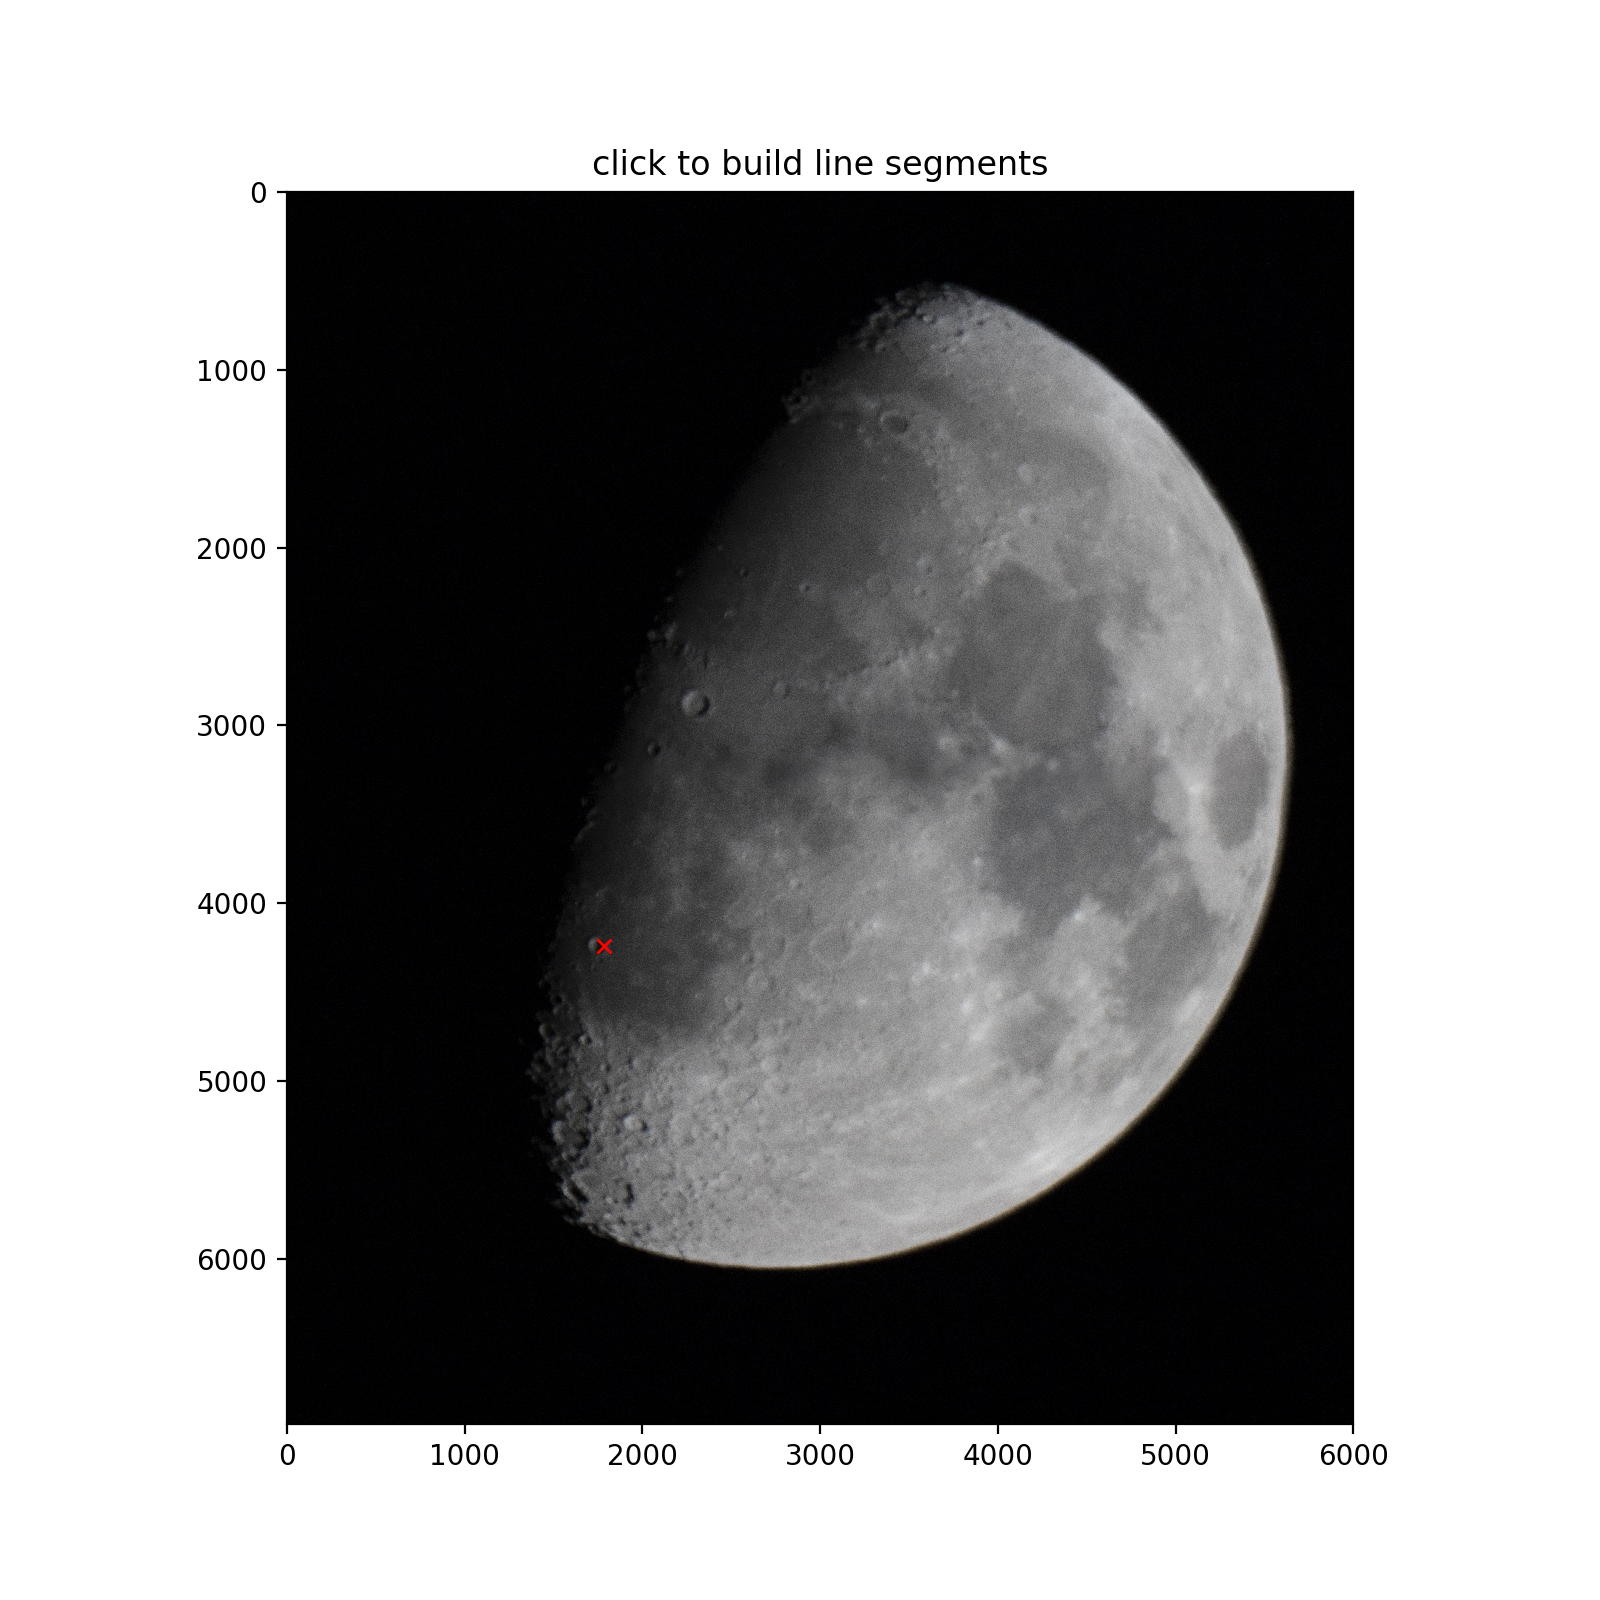

You can start selecting


In [13]:
n=1
#fig = plt.figure()#default
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.set_title('click to build line segments')
line, = ax.plot([], [], color='r', marker='x', markersize=5, linestyle='')  # empty line
linebuilder = LineBuilder(line, n)
jpg = plt.imread('MondMerge.jpg')

imshow(jpg)
#PIL.Image.fromarray(rgb).save('image.jpg', quality=90, optimize=True)
#print(np.mean(intensity))
print('You can start selecting')
plt.show()

The coordinates of the crater are appended to the list and then saved as text files.

In [14]:
xpunkt=linebuilder.xs
ypunkt=linebuilder.ys
coo = coordinates(xpunkt[0],ypunkt[0])

coord_pix.append((xpunkt[0],ypunkt[0]))
coord_unsere.append(coo)

Co = open('Coordinates_unsere', 'w')
Co.write(str(coord_unsere))
Co.close()

Co2 = open('Coordinates_pix', 'w')
Co2.write(str(coord_pix))
Co2.close()